Import python libraries required for the script

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from numpy.polynomial import polynomial as npp

warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

Read the CSV files

In [2]:
# df = pd.read_csv('VMI_Data_PA_V02_AK6_mod.csv')
# df = pd.read_csv('VMI_Data_BP1_V02_AK6_mod.csv')
# df = pd.read_csv('VMI_Data_BP2_V02_AK6_mod.csv')
df = pd.read_csv('VMI_Data_BP2_V02_AK6_mod02.csv')

# Sampling after cleanup
# df_sample = df.sample(10000)

Check the columns in the data

In [3]:
print(df.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'BP2_S8_L',
       'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L',
       'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R',
       'BP2_S5_R', 'BP2_S6_R', 'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH',
       'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
       'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5',
       'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20

In [4]:
df = df.drop(['LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'LFT_SPLICE_GRADE', 
              'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE', 'LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA', 'RHT_SPLICE_DELTA'
#               'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 
#               'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50',
#               , 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
#               'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
#               'MID_SPLICE_SLOPE50',  'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 
#               'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
#               'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'
             ], axis=1)

print(df.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L',
       'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L', 'BP2_S1_ML',
       'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R',
       'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH', 'LFT_SPLICE_PREV',
       'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20',
       'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10',
       'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_PREV',
       'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',
       'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
       'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50', 'SPLICE_GRADE'],
      dtype='object')


In [5]:
print(df.shape)
df = df.drop_duplicates()

print(df.shape)

(118739, 47)
(118739, 47)


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()

                 Total  Percent
SPLICE_GRADE         0      0.0
BP2_S2_R             0      0.0
LFT_SPLICE_MA5       0      0.0
LFT_SPLICE_PREV      0      0.0
PART_LENGTH          0      0.0
BP2_S8_R             0      0.0
BP2_S7_R             0      0.0
BP2_S6_R             0      0.0
BP2_S5_R             0      0.0
BP2_S4_R             0      0.0


In [7]:
def inverse(x):
    if x==0: 
        return 0
    return 1/x

In [8]:

df['CUT_LENGTH2'] = df['CUT_LENGTH']**2
df['CONV_WAIT_TIME2'] = df['CONV_WAIT_TIME']**2
df['BP2_S8_L2'] = df['BP2_S8_L']**2
df['BP2_S7_L2'] = df['BP2_S7_L']**2
df['BP2_S6_L2'] = df['BP2_S6_L']**2
df['BP2_S5_L2'] = df['BP2_S5_L']**2
df['BP2_S4_L2'] = df['BP2_S4_L']**2
df['BP2_S3_L2'] = df['BP2_S3_L']**2
df['BP2_S2_L2'] = df['BP2_S2_L']**2
df['BP2_S1_ML2'] = df['BP2_S1_ML']**2
df['BP2_S1_MR2'] = df['BP2_S1_MR']**2
df['BP2_S2_R2'] = df['BP2_S2_R']**2
df['BP2_S3_R2'] = df['BP2_S3_R']**2
df['BP2_S4_R2'] = df['BP2_S4_R']**2
df['BP2_S5_R2'] = df['BP2_S5_R']**2
df['BP2_S6_R2'] = df['BP2_S6_R']**2
df['BP2_S7_R2'] = df['BP2_S7_R']**2
df['BP2_S8_R2'] = df['BP2_S8_R']**2
df['LFT_SPLICE_PREV2'] = df['LFT_SPLICE_PREV']**2
df['MID_SPLICE_PREV2'] = df['MID_SPLICE_PREV']**2
df['RHT_SPLICE_PREV2'] = df['RHT_SPLICE_PREV']**2

df['CUT_LENGTH3'] = df['CUT_LENGTH'].apply(inverse)
df['CONV_WAIT_TIME3'] = df['CONV_WAIT_TIME'].apply(inverse)
df['BP2_S8_L3'] = df['BP2_S8_L'].apply(inverse)
df['BP2_S7_L3'] = df['BP2_S7_L'].apply(inverse)
df['BP2_S6_L3'] = df['BP2_S6_L'].apply(inverse)
df['BP2_S5_L3'] = df['BP2_S5_L'].apply(inverse)
df['BP2_S4_L3'] = df['BP2_S4_L'].apply(inverse)
df['BP2_S3_L3'] = df['BP2_S3_L'].apply(inverse)
df['BP2_S2_L3'] = df['BP2_S2_L'].apply(inverse)
df['BP2_S1_ML3'] = df['BP2_S1_ML'].apply(inverse)
df['BP2_S1_MR3'] = df['BP2_S1_MR'].apply(inverse)
df['BP2_S2_R3'] = df['BP2_S2_R'].apply(inverse)
df['BP2_S3_R3'] = df['BP2_S3_R'].apply(inverse)
df['BP2_S4_R3'] = df['BP2_S4_R'].apply(inverse)
df['BP2_S5_R3'] = df['BP2_S5_R'].apply(inverse)
df['BP2_S6_R3'] = df['BP2_S6_R'].apply(inverse)
df['BP2_S7_R3'] = df['BP2_S7_R'].apply(inverse)
df['BP2_S8_R3'] = df['BP2_S8_R'].apply(inverse)
df['LFT_SPLICE_PREV3'] = df['LFT_SPLICE_PREV'].apply(inverse)
df['MID_SPLICE_PREV3'] = df['MID_SPLICE_PREV'].apply(inverse)
df['RHT_SPLICE_PREV3'] = df['RHT_SPLICE_PREV'].apply(inverse)

scaler = MinMaxScaler()
mycols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 
          'BP2_S2_L', 'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R',
          'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH', 'LFT_SPLICE_PREV', 'MID_SPLICE_PREV', 'RHT_SPLICE_PREV', 
          'CUT_LENGTH2', 'CONV_WAIT_TIME2', 'BP2_S8_L2', 'BP2_S7_L2', 'BP2_S6_L2', 'BP2_S5_L2', 
          'BP2_S4_L2', 'BP2_S3_L2', 'BP2_S2_L2', 'BP2_S1_ML2', 'BP2_S1_MR2', 'BP2_S2_R2', 'BP2_S3_R2', 'BP2_S4_R2', 
          'BP2_S5_R2', 'BP2_S6_R2',  'BP2_S7_R2', 'BP2_S8_R2', 'LFT_SPLICE_PREV2', 'MID_SPLICE_PREV2', 
          'RHT_SPLICE_PREV2','LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',  
          'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 
          'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 
          'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_MA5', 
          'RHT_SPLICE_MA10','RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
          'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50','CUT_LENGTH3', 'CONV_WAIT_TIME3', 'BP2_S8_L3', 'BP2_S7_L3',
          'BP2_S6_L3', 'BP2_S5_L3', 'BP2_S4_L3', 'BP2_S3_L3', 'BP2_S2_L3', 'BP2_S1_ML3', 'BP2_S1_MR3', 
          'BP2_S2_R3', 'BP2_S3_R3', 'BP2_S4_R3', 'BP2_S5_R3', 'BP2_S6_R3', 'BP2_S7_R3', 'BP2_S8_R3', 
          'LFT_SPLICE_PREV3', 'MID_SPLICE_PREV3', 'RHT_SPLICE_PREV3']
df[mycols] = scaler.fit_transform(df[mycols])

In [9]:
# df = df.groupby('SPLICE_GRADE', group_keys=False).apply(lambda x: x.sample(120))
# df['SPLICE_GRADE'] = df.apply(numericSG, axis=1) 

spliceGrade = {'Bad': 0, 'OK': 1, 'Good': 1} 
# spliceGrade = {'Bad': 0, 'OK': 1, 'Good': 2} 
df.SPLICE_GRADE = [spliceGrade[item] for item in df.SPLICE_GRADE] 


# df.to_csv('temp.csv', header=True, index=False)

In [10]:
X = df.drop(['SPLICE_GRADE'], axis=1)
y = df['SPLICE_GRADE']
y = y.astype('int')

Optimal number of features : 45


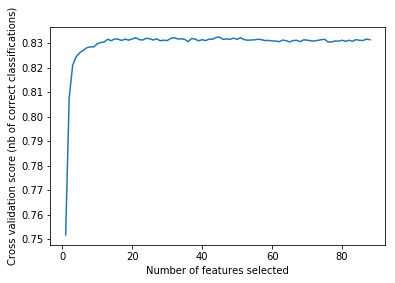

In [11]:
# Create the RFE object and compute a cross-validated score.
# clf = SVC(gamma='scale', random_state=7)
clf = RandomForestClassifier(n_estimators=100, n_jobs=3, random_state=7) # needs increase in n_estimators --> warm_start=True,

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [12]:
# from sklearn.metrics import roc_auc_score
# print('Overall AUC:', roc_auc_score(y, clf.predict_proba(X, ntree_limit=clf.best_iteration)[:,1]))
# y_pred = clf.predict_proba(X, ntree_limit=clf.best_iteration)


In [13]:
rfecv.ranking_

array([ 1,  1, 36, 31, 35, 23,  8,  1, 14,  1, 13, 19,  1, 17, 27, 42, 40,
       29,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 33, 43, 34,
       21, 18,  4,  1,  9,  1,  6, 12,  3, 24, 30, 38, 28,  1,  1,  1,  1,
        1, 41, 32, 44, 22,  7, 11, 16,  2,  5, 15, 10, 20, 26, 37, 39, 25,
        1,  1,  1])

In [14]:
rfecv.grid_scores_

array([0.7517496 , 0.80758638, 0.82094339, 0.82440478, 0.82598809,
       0.82703239, 0.82805143, 0.82842198, 0.82841355, 0.82963471,
       0.83022424, 0.83041795, 0.8315549 , 0.83095695, 0.83168121,
       0.83157176, 0.83104117, 0.83161386, 0.83117591, 0.83164755,
       0.83216127, 0.8314033 , 0.83123487, 0.83192547, 0.83175702,
       0.83121803, 0.8317486 , 0.83092326, 0.83115908, 0.83100749,
       0.83183282, 0.83220339, 0.83166439, 0.83171492, 0.83151279,
       0.83056113, 0.83186652, 0.83160543, 0.83092326, 0.8313612 ,
       0.83099064, 0.8315886 , 0.8315549 , 0.83232128, 0.8323634 ,
       0.8314791 , 0.83170649, 0.83147069, 0.83201811, 0.83148752,
       0.83218654, 0.8313949 , 0.83114222, 0.83123487, 0.83131068,
       0.8315549 , 0.83138646, 0.83099907, 0.83105802, 0.8308559 ,
       0.83082221, 0.83055271, 0.8312012 , 0.83098222, 0.83045164,
       0.83102432, 0.83110013, 0.83057798, 0.8312854 , 0.83120119,
       0.83090642, 0.83081378, 0.83107488, 0.83133595, 0.83154

In [15]:
# print "Features sorted by their rank:"
# print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

In [16]:
imp_features = rfecv.transform(X)
# imp_features

print(imp_features.shape) 
print(rfecv.get_support()) 


(118739, 45)
[ True  True False False False False False  True False  True False False
  True False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False  True False  True False False False
 False False False False  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False  True  True  True]


In [17]:
X.columns[(rfecv.get_support())]

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP2_S3_L', 'BP2_S1_ML', 'BP2_S3_R',
       'PART_LENGTH', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
       'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5',
       'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50',
       'MID_SPLICE_PREV', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10',
       'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5',
       'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50',
       'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
       'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5',
       'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50',
       'CUT_LENGTH2', 'CONV_WAIT_TIME2', 'BP2_S2_L2', 'BP2_S1_MR2',
       'LFT_SPLICE_PREV2', 'MID_SPLICE_PREV2', 'RHT_SPLICE_PREV2',
       'CUT_LENGTH3', 'CONV_WAIT_TIME3', 'LFT_SPLICE_PREV3',
       'MID_SPLICE_PREV3', 'RHT_SPLICE_PREV3'],
      dtype='object')

In [18]:
X.columns

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L',
       'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L', 'BP2_S1_ML',
       'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R',
       'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH', 'LFT_SPLICE_PREV',
       'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20',
       'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10',
       'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_PREV',
       'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',
       'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
       'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50', 'CUT_LENGTH2',
       'CONV_WAIT_TIME2', 'BP2_S8_L2', 'BP2_S7_L2', 'BP2_S6_L2', 'BP2_S5_L2',
       'BP2_S4_L2', 'BP2_S3_L2',

In [19]:
rfecv.support_

array([ True,  True, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True])

In [20]:
df.columns

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L',
       'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L', 'BP2_S1_ML',
       'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R',
       'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH', 'LFT_SPLICE_PREV',
       'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20',
       'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10',
       'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_PREV',
       'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',
       'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
       'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50', 'SPLICE_GRADE',
       'CUT_LENGTH2', 'CONV_WAIT_TIME2', 'BP2_S8_L2', 'BP2_S7_L2', 'BP2_S6_L2',
       'BP2_S5_L2', 'BP2_S4_L

In [21]:
rfecv.estimator_.feature_importances_ 

array([0.02110938, 0.01995009, 0.0103147 , 0.0108558 , 0.01061157,
       0.03067444, 0.02474324, 0.03058452, 0.02496952, 0.02150256,
       0.02059275, 0.02212885, 0.02177968, 0.02189699, 0.02105205,
       0.03144459, 0.03831345, 0.03884204, 0.0281809 , 0.0221539 ,
       0.02077383, 0.02140264, 0.02082234, 0.0202598 , 0.02380966,
       0.0269821 , 0.02402007, 0.02144018, 0.01998637, 0.02141854,
       0.02193943, 0.02113226, 0.02126423, 0.02110645, 0.02001299,
       0.00973779, 0.01069264, 0.02772934, 0.03197976, 0.02540024,
       0.02116593, 0.02030084, 0.01905686, 0.0188873 , 0.01697735])

In [22]:
pd.DataFrame({'columns' : X.columns, 'ranking' : rfecv.ranking_, 'gridscore' : rfecv.grid_scores_}).reset_index()

,index,columns,ranking,gridscore
0,0,CUT_LENGTH,1,0.751750
1,1,CONV_WAIT_TIME,1,0.807586
2,2,BP2_S8_L,36,0.820943
3,3,BP2_S7_L,31,0.824405
4,4,BP2_S6_L,35,0.825988
5,5,BP2_S5_L,23,0.827032
6,6,BP2_S4_L,8,0.828051
7,7,BP2_S3_L,1,0.828422
8,8,BP2_S2_L,14,0.828414
9,9,BP2_S1_ML,1,0.829635
